In [1]:
import sys
sys.path.insert(0, "../")

In [8]:
import matplotlib.pyplot as plt

from experiments.data_visualisation import fetch_and_aggregate_experiment_data

# BERT training

## BERT chunked HP tuning

In [26]:
def plot_data(data, num_epochs, data_key, trial_label_generator=None):
    for data in data:
        trial_name = data["trial_name"]
        
        y = data[data_key][:num_epochs]
        plt.plot(range(1, len(y)+1), y,
                 label=trial_name if trial_label_generator is None else
                     trial_label_generator(trial_name, data["hyperparameters"]),
                 marker='o')
        plt.xlabel("Epoch")
        plt.legend()

### Preprocessing choice

In [ ]:
def preprocess_label(t, hp):
    return {
        "[remove_emojis, remove_tags]": "-emojis, -tags",
        "[remove_emojis, remove_tags, remove_punctuation]": "-emojis, -tags, -punctuation",
        "[replace_emojis_no_sep, remove_tags]": "+emojis, -tags",
    }[hp.get('Bert.preprocessing')]

data, num_epochs = fetch_and_aggregate_experiment_data(
    "../../training/bert_clf/downstream_loss/indiv_2",
    trial_aggregator=lambda hp: hp.get('Bert.preprocessing'),
    trial_filterer=lambda t, hp: 
        hp.get("Bert.pooler") == "max" and hp.get("selected_encoder_outputs") == "default",
)

Text(0.5, 1.0, 'Training Loss')

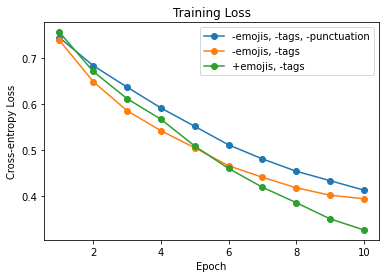

In [34]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_loss", trial_label_generator=preprocess_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

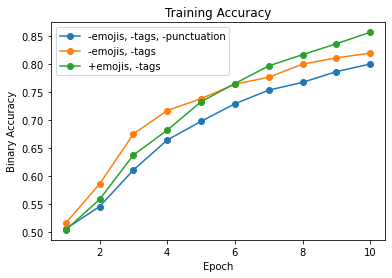

In [40]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_binary_accuracy", trial_label_generator=preprocess_label)
plt.ylabel("Binary Accuracy")
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Validation Loss')

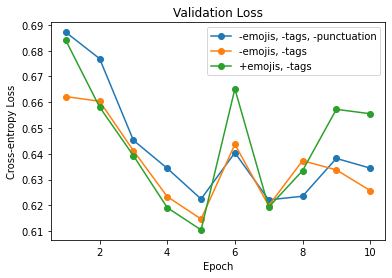

In [38]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_loss", trial_label_generator=preprocess_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Validation Loss")

Text(0.5, 1.0, 'Validation Accuracy')

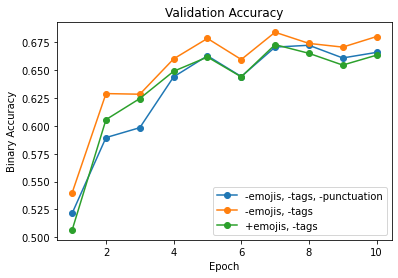

In [41]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_binary_accuracy", trial_label_generator=preprocess_label)
plt.ylabel("Binary Accuracy")
plt.title("Validation Accuracy")

### BERT pooled_output strategy

In [43]:
def encoder_outputs_label(t, hp):
    return {
        "default": "Last layer",
        "2nd_to_last_hidden_layer": "2nd-to-last layer",
        "sum_all_hidden_layers": "Sum all layers",
        "sum_last_4_hidden_layers": "Sum last 4 layers",
        "concat_last_4_hidden_layers": "Concatenate last 4 layers",
    }[hp.get('selected_encoder_outputs')]

data, num_epochs = fetch_and_aggregate_experiment_data(
    "../../training/bert_clf/downstream_loss/indiv_2",
    trial_aggregator=lambda hp: hp.get('selected_encoder_outputs'),
    trial_filterer=lambda t, hp: 
        hp.get("Bert.pooler") == "max" and hp.get("Bert.preprocessing") == "[remove_emojis, remove_tags]",
)

Text(0.5, 1.0, 'Training Loss')

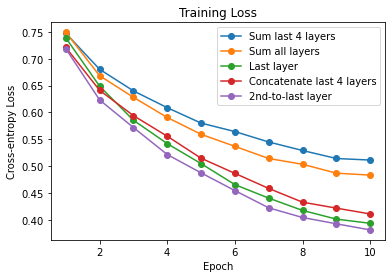

In [48]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_loss", trial_label_generator=encoder_outputs_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

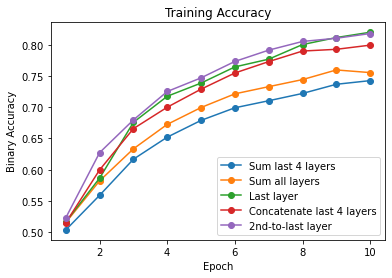

In [49]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_binary_accuracy", trial_label_generator=encoder_outputs_label)
plt.ylabel("Binary Accuracy")
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Validation Loss')

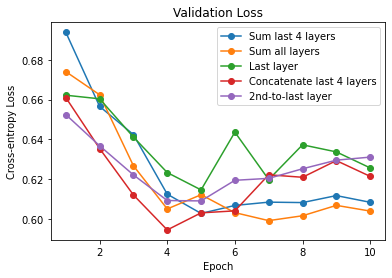

In [50]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_loss", trial_label_generator=encoder_outputs_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Validation Loss")

Text(0.5, 1.0, 'Validation Accuracy')

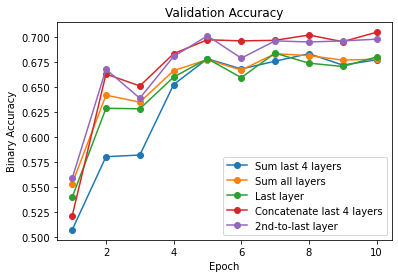

In [51]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_binary_accuracy", trial_label_generator=encoder_outputs_label)
plt.ylabel("Binary Accuracy")
plt.title("Validation Accuracy")

### BERT tweet embeddings pooler

In [52]:
def pooler_label(t, hp):
    return {
        "max": "Max",
        "concat": "Concatenate",
        "average": "Average"
    }[hp.get('Bert.pooler')]

data, num_epochs = fetch_and_aggregate_experiment_data(
    "../../training/bert_clf/downstream_loss/indiv_2",
    trial_aggregator=lambda hp: hp.get('Bert.pooler'),
    trial_filterer=lambda t, hp: 
        hp.get("selected_encoder_outputs") == "sum_all_hidden_layers" and 
        hp.get("Bert.preprocessing") == "[remove_emojis, remove_tags]",
)

Text(0.5, 1.0, 'Training Loss')

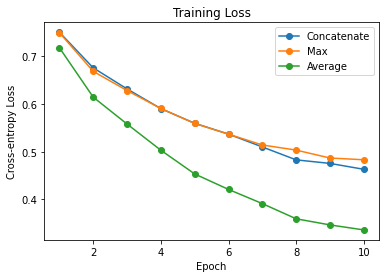

In [57]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_loss", trial_label_generator=pooler_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Training Loss")

Text(0.5, 1.0, 'Training Accuracy')

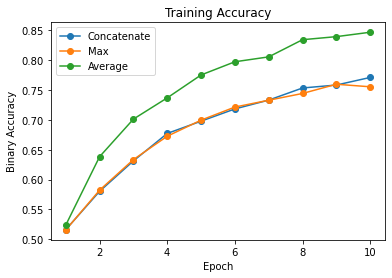

In [58]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "train-epoch_binary_accuracy", trial_label_generator=pooler_label)
plt.ylabel("Binary Accuracy")
plt.title("Training Accuracy")

Text(0.5, 1.0, 'Validation Loss')

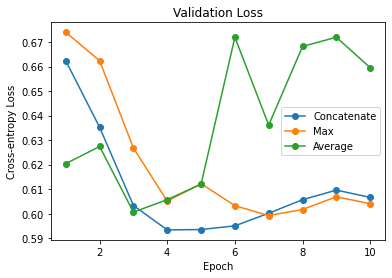

In [59]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_loss", trial_label_generator=pooler_label)
plt.ylabel("Cross-entropy Loss")
plt.title("Validation Loss")

Text(0.5, 1.0, 'Validation Accuracy')

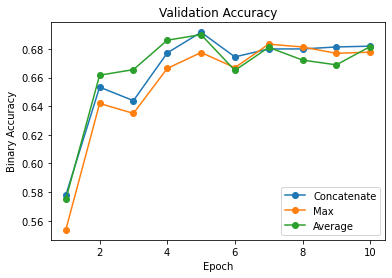

In [60]:
# plt.figure(figsize=(8, 6), dpi=300)
plot_data(data, num_epochs, "validation-epoch_binary_accuracy", trial_label_generator=pooler_label)
plt.ylabel("Binary Accuracy")
plt.title("Validation Accuracy")